In [20]:
from hdimvis.metrics.stress.stress import vectorised_stress,unvectorised_stress
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import euclidean,manhattan
from experiments.utils.smooth_running_mean import smooth_running_mean
import numpy as np
import definitions
import matplotlib.pylab as plt
import os

In [2]:
output_dir = os.path.realpath(os.path.join(definitions.PROJECT_ROOT, "experiments/stress_vectorisation/out/stress_vec_1.npy"))

In [3]:
with open(output_dir, 'rb') as f:
    vectorised_data = np.load(f)
    un_vectorised_data= np.load(f)
print(vectorised_data.shape)
print(un_vectorised_data.shape)

(101, 3, 3)
(101, 3, 3)


[[  1.325933   1.322056   1.322056]
 [ 11.363656  11.363656  11.363656]
 [ 31.446856  31.446856  31.446856]
 [ 61.571656  61.571656  61.571656]
 [101.738056 101.738056 101.738056]
 [151.976632 151.976632 151.977202]
 [212.264632 212.264632 212.264632]
 [282.600632 282.601202 282.600632]
 [362.984632 362.984632 362.984632]
 [453.416632 453.416632 453.416632]]


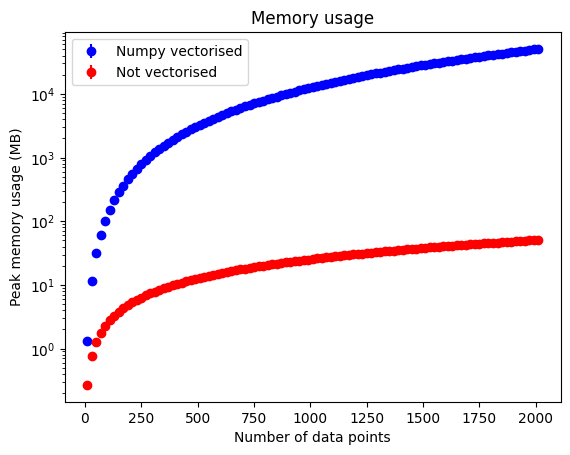

In [17]:
# 3 columns for memory use base (index 0), memory use peak (1) and time (index 2)

fig, ax = plt.subplots()

sizes = np.arange(10,2020, 20)
y1 = vectorised_data[:,1,:]/10**6
print(y1[:10])
mean_y1 = np.mean(y1, axis=1)
max_y1 = np.max(y1, axis=1) - mean_y1
min_y1 = np.abs(mean_y1 -  np.min(y1, axis=1)) # tiny values - numerical errors result in -ve values


y2 = un_vectorised_data[:,1,:]/10**6
mean_y2 = np.mean(y2, axis=1)
max_y2 = np.max(y2, axis=1) - mean_y2
min_y2 = np.abs(mean_y2 -  np.min(y2, axis=1))

ax.set_ylabel("Peak memory usage (MB)")
ax.set_xlabel("Number of data points")

ax.errorbar(sizes, mean_y1, yerr=np.vstack((min_y1,max_y1)), fmt='o', c='b', label='Numpy vectorised')
ax.errorbar(sizes, mean_y2, yerr=np.vstack((min_y2,max_y2)), fmt='o', c='r', label='Not vectorised')
plt.yscale("log")
plt.title("Memory usage")
plt.legend()
plt.show()

[[1.93299958e-04 1.20099983e-04 1.38600008e-04]
 [3.53069999e-03 3.23799998e-03 3.66170006e-03]
 [9.69099998e-03 1.05524000e-02 9.52470000e-03]
 [1.73789000e-02 1.73563000e-02 1.71560000e-02]
 [2.91062000e-02 3.08321000e-02 2.95623000e-02]
 [4.27679000e-02 4.26990000e-02 5.61210001e-02]
 [5.92000000e-02 6.03688001e-02 5.94175000e-02]
 [7.95639000e-02 7.99776000e-02 8.57269999e-02]
 [1.01122600e-01 1.01296600e-01 1.31428300e-01]
 [1.27495000e-01 1.29386000e-01 1.60554500e-01]]


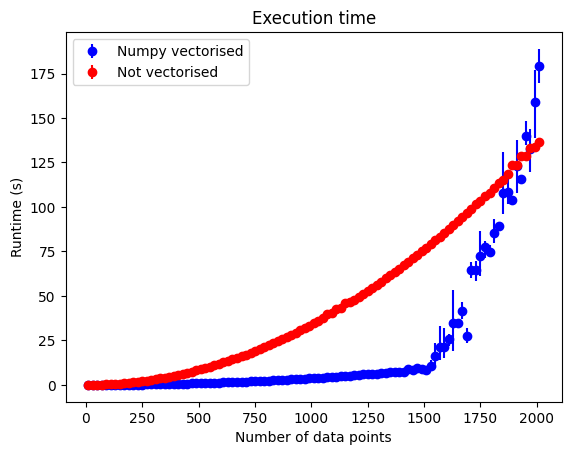

In [19]:
fig, ax = plt.subplots()

sizes = np.arange(10,2020, 20)
y1 = vectorised_data[:,2,:]
print(y1[:10])
mean_y1 = np.mean(y1, axis=1)
max_y1 = np.max(y1, axis=1) - mean_y1
min_y1 = np.abs(mean_y1 -  np.min(y1, axis=1)) # tiny values - numerical errors result in -ve values


y2 = un_vectorised_data[:,2,:]
mean_y2 = np.mean(y2, axis=1)
max_y2 = np.max(y2, axis=1) - mean_y2
min_y2 = np.abs(mean_y2 -  np.min(y2, axis=1))


ax.errorbar(sizes, mean_y1, yerr=np.vstack((min_y1,max_y1)), fmt='o', c='b', label='Numpy vectorised')
ax.errorbar(sizes, mean_y2, yerr=np.vstack((min_y2,max_y2)), fmt='o', c='r', label='Not vectorised')


ax.set_xlabel("Number of data points")
ax.set_ylabel("Runtime (s)")

plt.title("Execution time")
plt.legend()
plt.show()

[[1.93299958e-04 1.20099983e-04 1.38600008e-04]
 [3.53069999e-03 3.23799998e-03 3.66170006e-03]
 [9.69099998e-03 1.05524000e-02 9.52470000e-03]
 [1.73789000e-02 1.73563000e-02 1.71560000e-02]
 [2.91062000e-02 3.08321000e-02 2.95623000e-02]
 [4.27679000e-02 4.26990000e-02 5.61210001e-02]
 [5.92000000e-02 6.03688001e-02 5.94175000e-02]
 [7.95639000e-02 7.99776000e-02 8.57269999e-02]
 [1.01122600e-01 1.01296600e-01 1.31428300e-01]
 [1.27495000e-01 1.29386000e-01 1.60554500e-01]]


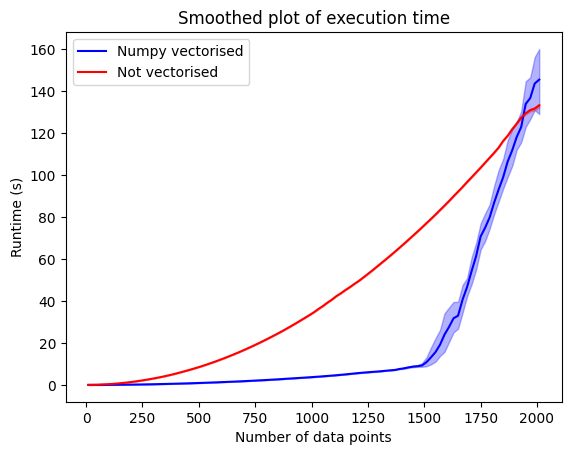

In [30]:
plt.show()
fig, ax = plt.subplots()

sizes = np.arange(10, 2020, 20)
y1 = vectorised_data[:, 2, :]
print(y1[:10])
mean_y1 = smooth_running_mean(np.mean(y1, axis=1),5)
# max_y1 = smooth_running_mean(np.max(y1, axis=1) - mean_y1,5)
# min_y1 = smooth_running_mean(np.abs(mean_y1 - np.min(y1, axis=1)),5)  # tiny values - numerical errors result in -ve values

y2 = un_vectorised_data[:, 2, :]
mean_y2 = smooth_running_mean(np.mean(y2, axis=1),5)
# max_y2 = smooth_running_mean( np.max(y2, axis=1) - mean_y2,5 )
# min_y2 = smooth_running_mean( np.abs(mean_y2 - np.min(y2, axis=1)),5 )

ax.plot(sizes, mean_y1, c='b', label='Numpy vectorised')
ax.plot(sizes, mean_y2, c='r', label='Not vectorised')

ax.fill_between(sizes, smooth_running_mean(np.min(y1, axis=1),5), smooth_running_mean(np.max(y1, axis=1), 5), color='b', alpha=0.3)
ax.fill_between(sizes, smooth_running_mean(np.min(y2, axis=1),5), smooth_running_mean(np.max(y2, axis=1), 5), color='r', alpha=0.3)

ax.set_xlabel("Number of data points")
ax.set_ylabel("Runtime (s)")

plt.title("Smoothed plot of execution time")
plt.legend()
plt.show()